In [1]:
import pandas as pd
raw_df=pd.read_excel('/content/bank.xlsx')

In [2]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 5000 non-null   int64
 1   Age                5000 non-null   int64
 2   Income             5000 non-null   int64
 3   ZIPCode            5000 non-null   int64
 4   Family             5000 non-null   int64
 5   Education          5000 non-null   int64
 6   Mortgage           5000 non-null   int64
 7   PersonalLoan       5000 non-null   int64
 8   SecuritiesAccount  5000 non-null   int64
 9   CDAccount          5000 non-null   int64
 10  Online             5000 non-null   int64
 11  CreditCard         5000 non-null   int64
dtypes: int64(12)
memory usage: 468.9 KB


In [3]:
raw_df.head()

,ID,Age,Income,ZIPCode,Family,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,49,91107,4,1,0,0,1,0,0,0
1,3,39,11,94720,1,1,0,0,0,0,0,0
2,4,35,100,94112,1,2,0,0,0,0,0,0
3,6,37,29,92121,4,2,155,0,0,0,1,0
4,7,53,72,91711,2,2,0,0,0,0,1,0


In [212]:
##-------------------------------------------------------------------
##  Select the Predictor Variables into a dataframe called X_features
##--------------------------------------------------------------------
X_features = list( raw_df.columns )
X_features.remove( 'ID' )
X_features.remove( 'PersonalLoan' )
X_features.remove( 'ZIPCode' )

In [213]:
print(X_features)

['Age', 'Income', 'Family', 'Education', 'Mortgage', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard']


In [214]:
##------------------------------------------
##  Set up a dataframe with only X-variables
##------------------------------------------
X =  raw_df[X_features]

In [215]:
##------------------------------------------
##  Identify the Class Label or Y variable
##------------------------------------------
Y = raw_df.PersonalLoan.astype('category')

print(Y.info())

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: PersonalLoan
Non-Null Count  Dtype   
--------------  -----   
5000 non-null   category
dtypes: category(1)
memory usage: 5.1 KB
None


In [216]:
##-----------------------------------------
##  Split the Data into Training and Test
##  test size=0.3 indicates 70% training and
##  30% test data
##-----------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
Y,
test_size = 0.3,
random_state = 500)
print(y_train.info())

##############################################################################
##  All data processing should be done after split to prevent data leakage  ##
##############################################################################

<class 'pandas.core.series.Series'>
Index: 3500 entries, 294 to 951
Series name: PersonalLoan
Non-Null Count  Dtype   
--------------  -----   
3500 non-null   category
dtypes: category(1)
memory usage: 30.9 KB
None


In [217]:
##############################################################################
##  Pre-process X-vars   ##
##############################################################################

##-----------------------------------------------------------------------
##  1. Identify and dummy code (one-hot encoding) the categorical column
##-----------------------------------------------------------------------
# List of categorical columns
categorical_columns = ['Education','CreditCard','SecuritiesAccount','CDAccount','Online']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns,drop_first = True,dtype=int )
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns,drop_first = True ,dtype=int)

In [218]:
##-----------------------------------------------------------------------
##  2. Normalise the cont. columns
##-----------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler
continuous_columns= ['Family','Age','Income','Mortgage']
scaler_min_max = MinMaxScaler()
X_train_encoded[continuous_columns] = scaler_min_max.fit_transform(X_train_encoded[continuous_columns])
X_test_encoded[continuous_columns] = scaler_min_max.fit_transform(X_test_encoded[continuous_columns])

In [219]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3500 entries, 294 to 951
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  3500 non-null   float64
 1   Income               3500 non-null   float64
 2   Family               3500 non-null   float64
 3   Mortgage             3500 non-null   float64
 4   Education_2          3500 non-null   int64  
 5   Education_3          3500 non-null   int64  
 6   CreditCard_1         3500 non-null   int64  
 7   SecuritiesAccount_1  3500 non-null   int64  
 8   CDAccount_1          3500 non-null   int64  
 9   Online_1             3500 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 300.8 KB


In [220]:
X_train_encoded.head()

,Age,Income,Family,Mortgage,Education_2,Education_3,CreditCard_1,SecuritiesAccount_1,CDAccount_1,Online_1
294,0.454545,0.671296,0.333333,0.000000,0,0,0,0,0,1
1118,0.772727,0.342593,0.333333,0.130709,0,0,1,0,0,0
2461,0.750000,0.379630,0.333333,0.000000,0,1,0,0,0,0
353,0.659091,0.106481,1.000000,0.222047,0,0,1,0,0,1
704,0.613636,0.032407,0.333333,0.159055,1,0,0,0,0,0


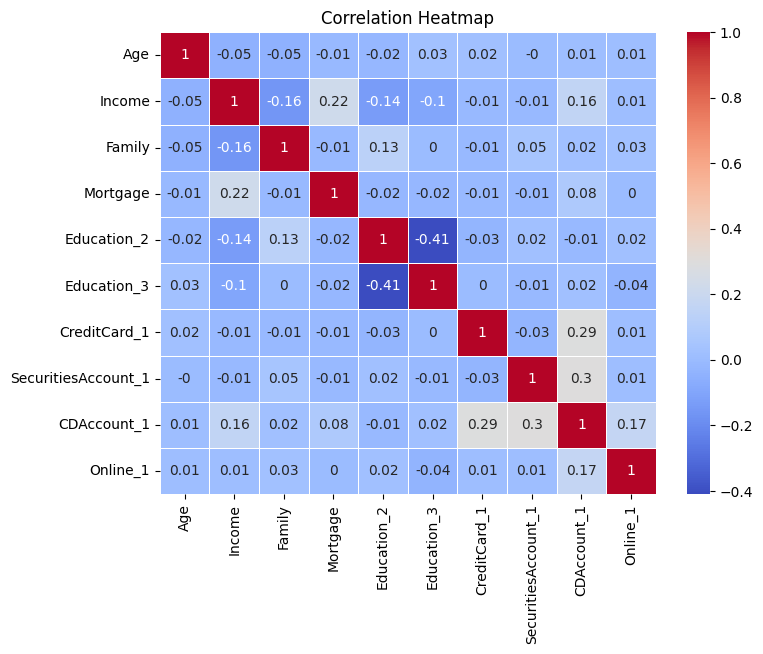

In [221]:
##-----------------------------------------------------------------------
##  3. Identify and and remove highly correlated columns
##-----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = X_train_encoded.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
## none of the x variable is correlated

In [222]:
corr_matrix

,Age,Income,Family,Mortgage,Education_2,Education_3,CreditCard_1,SecuritiesAccount_1,CDAccount_1,Online_1
Age,1.000000,-0.052295,-0.045459,-0.012691,-0.016479,0.028996,0.015288,-0.001052,0.012290,0.008944
Income,-0.052295,1.000000,-0.159216,0.215210,-0.135392,-0.100828,-0.006852,-0.012764,0.162467,0.008765
Family,-0.045459,-0.159216,1.000000,-0.010556,0.129814,0.000441,-0.010368,0.047647,0.019720,0.031076
Mortgage,-0.012691,0.215210,-0.010556,1.000000,-0.024895,-0.015982,-0.008228,-0.013972,0.082657,0.000896
Education_2,-0.016479,-0.135392,0.129814,-0.024895,1.000000,-0.412484,-0.026451,0.016075,-0.007557,0.024279
Education_3,0.028996,-0.100828,0.000441,-0.015982,-0.412484,1.000000,0.000864,-0.012340,0.022837,-0.037197
CreditCard_1,0.015288,-0.006852,-0.010368,-0.008228,-0.026451,0.000864,1.000000,-0.025719,0.287796,0.011233
SecuritiesAccount_1,-0.001052,-0.012764,0.047647,-0.013972,0.016075,-0.012340,-0.025719,1.000000,0.303663,0.007483
CDAccount_1,0.012290,0.162467,0.019720,0.082657,-0.007557,0.022837,0.287796,0.303663,1.000000,0.166254
Online_1,0.008944,0.008765,0.031076,0.000896,0.024279,-0.037197,0.011233,0.007483,0.166254,1.000000


In [223]:
from sklearn.neural_network import MLPClassifier
#nn_model = MLPClassifier(random_state=42)
#nn_model = MLPClassifier(random_state=42,verbose=True)
#nn_model = MLPClassifier(random_state=42,verbose=True,max_iter=1500,early_stopping=True)
#nn_model = MLPClassifier(random_state=42,verbose=True,max_iter=1500,early_stopping=True,hidden_layer_sizes=(9,))
nn_model = MLPClassifier(random_state=42,verbose=True,max_iter=1500,early_stopping=True,hidden_layer_sizes=(9,),learning_rate_init=0.01)

In [224]:
print("Hyperparameters of the MLPClassifier:\n",nn_model.get_params() )

Hyperparameters of the MLPClassifier:
 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (9,), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_fun': 15000, 'max_iter': 1500, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': True, 'warm_start': False}


In [225]:
##-------------------------------------------------------
##  Train NN model on training data
##-------------------------------------------------------
nn_model.fit(X_train_encoded, y_train)

Iteration 1, loss = 0.40061290
Validation score: 0.908571
Iteration 2, loss = 0.30251421
Validation score: 0.908571
Iteration 3, loss = 0.26099672
Validation score: 0.908571
Iteration 4, loss = 0.22524338
Validation score: 0.917143
Iteration 5, loss = 0.19403229
Validation score: 0.937143
Iteration 6, loss = 0.17257095
Validation score: 0.945714
Iteration 7, loss = 0.15664163
Validation score: 0.960000
Iteration 8, loss = 0.14566505
Validation score: 0.951429
Iteration 9, loss = 0.13587831
Validation score: 0.957143
Iteration 10, loss = 0.12907455
Validation score: 0.965714
Iteration 11, loss = 0.12337523
Validation score: 0.962857
Iteration 12, loss = 0.11846184
Validation score: 0.965714
Iteration 13, loss = 0.11549827
Validation score: 0.977143
Iteration 14, loss = 0.11262230
Validation score: 0.965714
Iteration 15, loss = 0.10886943
Validation score: 0.971429
Iteration 16, loss = 0.10530832
Validation score: 0.971429
Iteration 17, loss = 0.10370042
Validation score: 0.977143
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(9,),
              learning_rate_init=0.01, max_iter=1500, random_state=42,
              verbose=True)

In [226]:
##----------------------------
##  Apply model on test data
##----------------------------
y_prob=nn_model.predict_proba(X_test_encoded)[:,1] # probabilities
#y_prob holds the probability values for each record in the test data

In [227]:
y_prob

array([7.39082971e-03, 3.03628937e-04, 9.74817906e-01, ...,
       2.82851379e-03, 8.17245769e-04, 5.49879485e-03])

In [228]:
#Create a dataframe to store the test data's Y value and the predicted probability value
#The original admit column is stored as "actual_Y"
#The predicted prob is stored in y_prob
y_pred_df = pd.DataFrame( { "actual_Y": y_test,
"predicted_prob":y_prob})
print(y_pred_df.head())

     actual_Y  predicted_prob
2187        0        0.007391
116         0        0.000304
4973        1        0.974818
834         1        0.666515
1370        0        0.002723


In [229]:
##---------------------------------
##  Based on default cut-off -0.5
##---------------------------------
y_pred_df['predicted_Y'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x >= 0.5 else 0)
print(y_pred_df.head())

     actual_Y  predicted_prob  predicted_Y
2187        0        0.007391            0
116         0        0.000304            0
4973        1        0.974818            1
834         1        0.666515            1
1370        0        0.002723            0


In [230]:
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix using the DataFrame columns
cm = confusion_matrix(y_pred_df['actual_Y'],y_pred_df['predicted_Y'])
print(cm)

[[1328   16]
 [  34  122]]


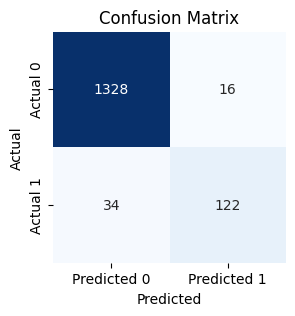

In [231]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [232]:
# Calculate Sensitivity (Recall), Specificity, and Accuracy using scikit-learn functions
from sklearn.metrics import  accuracy_score, recall_score, precision_score
sensitivity = recall_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])
accuracy = accuracy_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])

# Print metrics
print(f"Sensitivity (Recall): {sensitivity:.2f}")
#print(f"Specificity: {specificity:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Sensitivity (Recall): 0.78
Accuracy: 0.97


In [233]:
from sklearn.metrics import confusion_matrix, classification_report
print("\nClassification Report:")
print(classification_report(y_pred_df['actual_Y'],y_pred_df['predicted_Y']))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1344
           1       0.88      0.78      0.83       156

    accuracy                           0.97      1500
   macro avg       0.93      0.89      0.91      1500
weighted avg       0.97      0.97      0.97      1500



In [234]:
### Accuracy= 97%
### Sensitivity= 78%
### +ve-class (Personal Loan), accept model on 78% Sensitivity (Bank Model)
### Accept the model, report the hyperparameters > iteration =1500 with early stop, hidden nodes=9 in a single layer, Iteration rate = 0.01